In [2]:
import json
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Load the dictionary from the JSON file
json_file = 'data&labels.json'
with open(json_file, 'r') as f:
    image_dict = json.load(f)

# Load images and labels from the dictionary
image_paths, labels = zip(*image_dict.items())

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Load images and resize them to a fixed size
images = []
for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))  # Resize to 100x100 (adjust as needed)
    images.append(img)

images = np.array(images)

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.4, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='),
    Dense(5, activation='softmax')  # Assuming 5 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/20


2024-04-17 10:46:20.272835: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 4s 212ms/step - loss: 1.6185 - accuracy: 0.2168 - val_loss: 1.5992 - val_accuracy: 0.2791
Epoch 2/20
20/20 [==============================] - 4s 209ms/step - loss: 1.4279 - accuracy: 0.3981 - val_loss: 1.4653 - val_accuracy: 0.4150
Epoch 3/20
20/20 [==============================] - 4s 208ms/step - loss: 1.1949 - accuracy: 0.5049 - val_loss: 1.4649 - val_accuracy: 0.4005
Epoch 4/20
20/20 [==============================] - 4s 215ms/step - loss: 0.8827 - accuracy: 0.6715 - val_loss: 1.4913 - val_accuracy: 0.4466
Epoch 5/20
20/20 [==============================] - 4s 215ms/step - loss: 0.5442 - accuracy: 0.8010 - val_loss: 2.0305 - val_accuracy: 0.3786
Epoch 6/20
20/20 [==============================] - 4s 215ms/step - loss: 0.3580 - accuracy: 0.8770 - val_loss: 2.3125 - val_accuracy: 0.4102
Epoch 7/20
20/20 [==============================] - 4s 212ms/step - loss: 0.1329 - accuracy: 0.9660 - val_loss: 2.9664 - val_accuracy: 0.4102
Epoch 8/20
20/20 

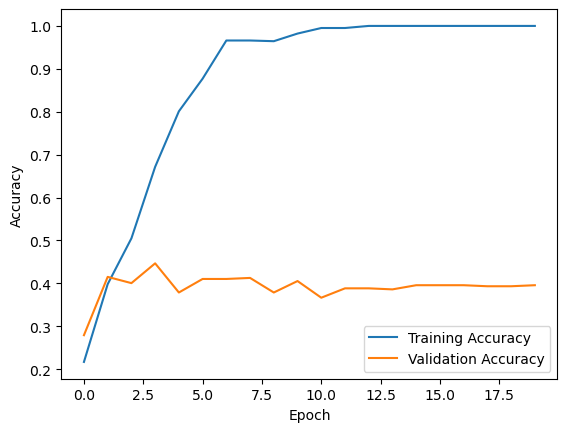

In [5]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

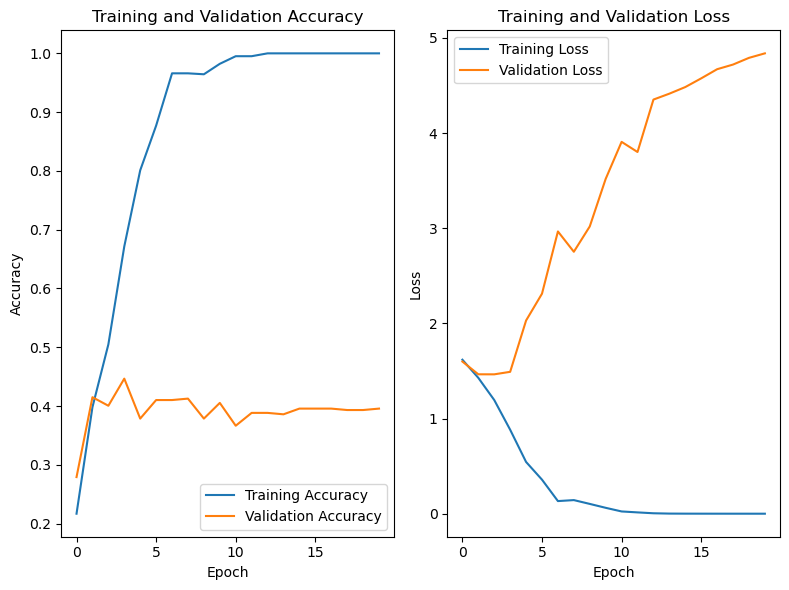

In [6]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

- Try the model on 2 breeds with different characteristics to see if it works best on those.